In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import joblib


In [2]:
data = pd.read_csv('./dataset/cardio_train.csv', sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

68983

In [4]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]

In [5]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68975 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
 12  bmi          68975 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


In [7]:
target_name = 'cardio'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

In [8]:
train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [9]:
train.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
31684,21263,2,160,76.0,130,80,1,1,0,1,1,29.687500
5634,14684,2,184,70.0,120,80,1,1,0,0,1,20.675803
58675,23436,1,158,76.0,120,80,1,1,0,0,1,30.443839
63449,18030,1,155,65.0,120,90,1,1,0,0,1,27.055151
58623,16249,1,153,58.0,120,80,1,1,0,0,1,24.776795


In [10]:
test.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
51756,20272,1,161,75.0,120,80,1,1,0,0,1,28.934069
9378,21872,1,175,70.0,120,70,1,1,0,0,1,22.857143
5060,18140,1,165,65.0,120,80,2,2,0,0,1,23.875115
44847,18900,1,171,61.0,120,80,1,1,0,0,1,20.861120
41960,15235,2,168,72.0,110,80,2,1,0,0,1,25.510204


In [11]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 55180 entries, 31684 to 69281
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          55180 non-null  int64  
 1   gender       55180 non-null  int64  
 2   height       55180 non-null  int64  
 3   weight       55180 non-null  float64
 4   ap_hi        55180 non-null  int64  
 5   ap_lo        55180 non-null  int64  
 6   cholesterol  55180 non-null  int64  
 7   gluc         55180 non-null  int64  
 8   smoke        55180 non-null  int64  
 9   alco         55180 non-null  int64  
 10  active       55180 non-null  int64  
 11  bmi          55180 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 5.5 MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13795 entries, 51756 to 61199
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          13795 non-null  int64  
 1   gender       13795 non-null  int64  
 2   height       13795 non-null  int64  
 3   weight       13795 non-null  float64
 4   ap_hi        13795 non-null  int64  
 5   ap_lo        13795 non-null  int64  
 6   cholesterol  13795 non-null  int64  
 7   gluc         13795 non-null  int64  
 8   smoke        13795 non-null  int64  
 9   alco         13795 non-null  int64  
 10  active       13795 non-null  int64  
 11  bmi          13795 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 1.4 MB


In [13]:
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2, random_state=0)

In [14]:
Xtrain


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
21095,19593,1,165,67.0,120,80,1,1,0,0,1,24.609734
15989,19763,1,166,64.0,140,100,1,1,0,0,1,23.225432
57256,15169,1,156,53.0,90,60,1,1,0,0,1,21.778435
26799,18221,1,169,70.0,120,60,1,1,0,0,1,24.508946
66388,15102,1,165,78.0,110,60,1,1,0,0,1,28.650138
...,...,...,...,...,...,...,...,...,...,...,...,...
21990,18436,1,170,70.0,110,70,1,1,0,0,1,24.221453
3894,14870,1,159,67.0,100,60,2,1,0,0,1,26.502116
12122,20666,2,176,84.0,120,80,1,1,1,0,0,27.117769
65485,15415,1,168,83.0,120,80,1,1,0,0,1,29.407596


In [15]:
logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


72.3

In [16]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

72.64

In [17]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,gluc,0.392693
7,smoke,0.079655
3,ap_hi,0.070808
4,ap_lo,0.045409
5,cholesterol,0.019478
1,height,0.011273
0,gender,0.000136
8,alco,-0.021764
9,active,-0.026721
2,weight,-0.070147


In [18]:
svc = SVC()
svc.fit(train, target)
acc_svc = round(svc.score(train, target) * 100, 2)
acc_svc

60.22

In [19]:
acc_test_svc = round(svc.score(test, target_test) * 100, 2)
acc_test_svc

59.41

In [20]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(train, target)
acc_linear_svc = round(linear_svc.score(train, target) * 100, 2)
acc_linear_svc

72.11

In [21]:
acc_test_linear_svc = round(linear_svc.score(test, target_test) * 100, 2)
acc_test_linear_svc

72.71

In [22]:
knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

81.53 {'n_neighbors': 3}


In [23]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

66.87

In [24]:
gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

70.27

In [25]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

70.26

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

99.98

In [27]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

64.22

In [28]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

99.98 {'n_estimators': 300}


In [29]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

71.62

In [30]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 'k-Nearest Neighbors', 'Naive Bayes', 
              'Decision Tree Classifier', 'Random Forest'],
    
    'Score_train': [acc_log, acc_svc, acc_linear_svc, acc_knn, acc_gaussian, 
              acc_decision_tree, acc_random_forest],
    'Score_test': [acc_test_log, acc_test_svc, acc_test_linear_svc, acc_test_knn, acc_test_gaussian, 
              acc_test_decision_tree, acc_test_random_forest]
                    })

In [31]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
6,Random Forest,99.98,71.62
5,Decision Tree Classifier,99.98,64.22
3,k-Nearest Neighbors,81.53,66.87
0,Logistic Regression,72.30,72.64
2,Linear SVC,72.11,72.71
4,Naive Bayes,70.27,70.26
1,Support Vector Machines,60.22,59.41


In [32]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
2,Linear SVC,72.11,72.71
0,Logistic Regression,72.30,72.64
6,Random Forest,99.98,71.62
4,Naive Bayes,70.27,70.26
3,k-Nearest Neighbors,81.53,66.87
5,Decision Tree Classifier,99.98,64.22
1,Support Vector Machines,60.22,59.41


In [33]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
4,Naive Bayes,70.27,70.26,0.01
0,Logistic Regression,72.30,72.64,0.34
2,Linear SVC,72.11,72.71,0.60
1,Support Vector Machines,60.22,59.41,0.81
3,k-Nearest Neighbors,81.53,66.87,14.66
6,Random Forest,99.98,71.62,28.36
5,Decision Tree Classifier,99.98,64.22,35.76


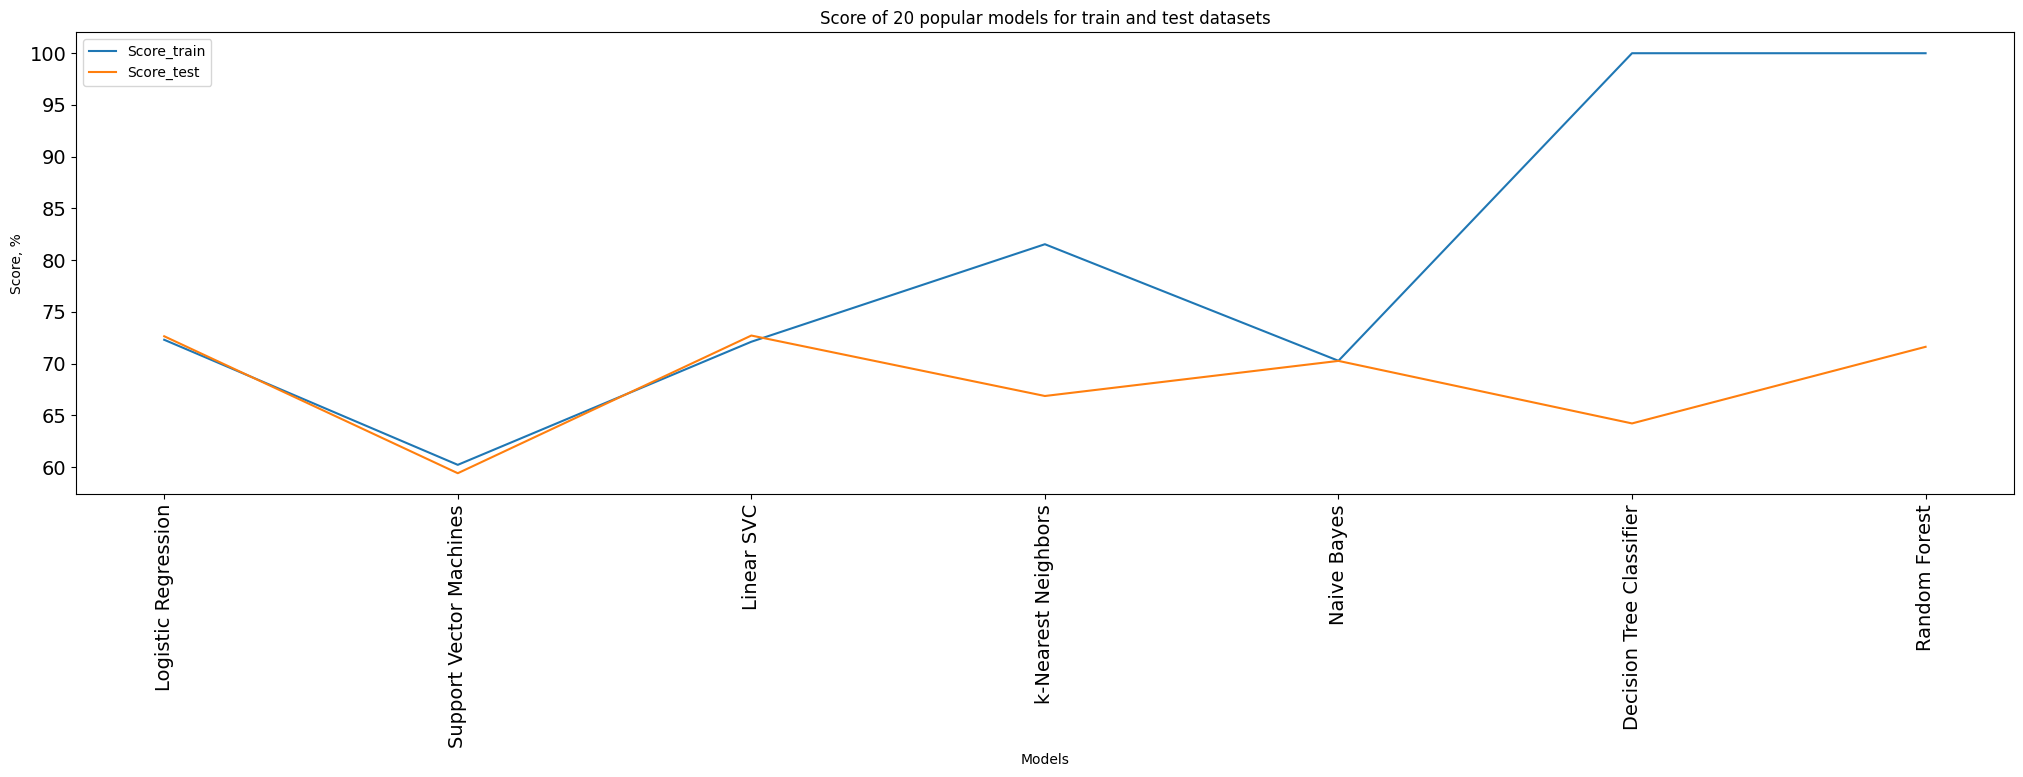

In [34]:
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 20 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.show()


In [35]:
joblib.dump(random_forest.best_estimator_,'../../Models/cardiovascular.pkl')

['../../Models/cardiovascular.pkl']